In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('PlayerIndex_nba_stats.csv')

df

,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,POR,...,1990.0,1.0,25.0,NaN,5.7,3.3,0.3,Career,1990,1994
1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,HOU,...,1968.0,1.0,5.0,NaN,9.0,8.0,1.2,Career,1968,1977
2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,LAL,...,1969.0,1.0,1.0,NaN,24.6,11.2,3.6,Career,1969,1988
3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,DEN,...,1990.0,1.0,3.0,NaN,14.6,1.9,3.5,Career,1990,2000
4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,SAC,...,1997.0,1.0,11.0,NaN,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,1627826,Zubac,Ivica,ivica-zubac,1610612746,clippers,0,LA,Clippers,LAC,...,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5021,78650,Zunic,Matt,matt-zunic,1610610036,NaN,1,Washington,Capitols,WAS,...,1947.0,NaN,NaN,NaN,4.9,NaN,0.9,Career,1948,1948
5022,1641783,da Silva,Tristan,tristan-da-silva,1610612753,magic,0,Orlando,Magic,ORL,...,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,1628427,Čančar,Vlatko,vlatko-čančar,1610612743,nuggets,0,Denver,Nuggets,DEN,...,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


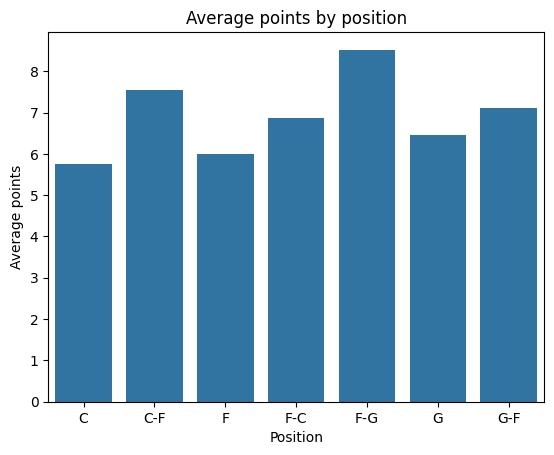

In [6]:
# average points by position

df["PTS"] = pd.to_numeric(df["PTS"], errors="coerce")

df["PTS"] = df["PTS"].fillna(0)

df_posi = df.groupby("POSITION")["PTS"].mean()

graphic = sns.barplot(x=df_posi.index, y=df_posi.values)

graphic.set_title("Average points by position")

graphic.set_xlabel("Position")

graphic.set_ylabel("Average points")

plt.show()


Text(0.5, 1.0, 'Average assists by position')

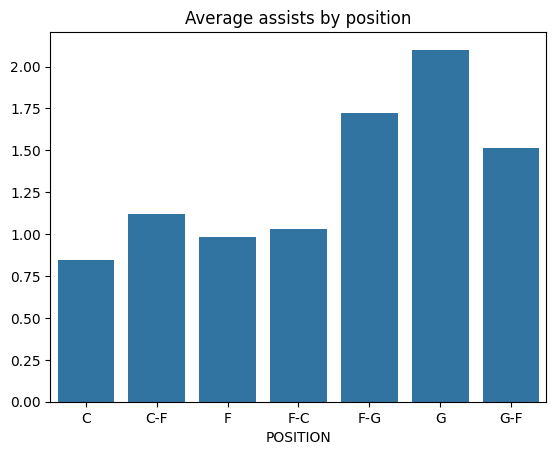

In [7]:
df_posi = df.groupby("POSITION")["AST"].mean()

graphic = sns.barplot(x=df_posi.index, y=df_posi.values)

graphic.set_title("Average assists by position")

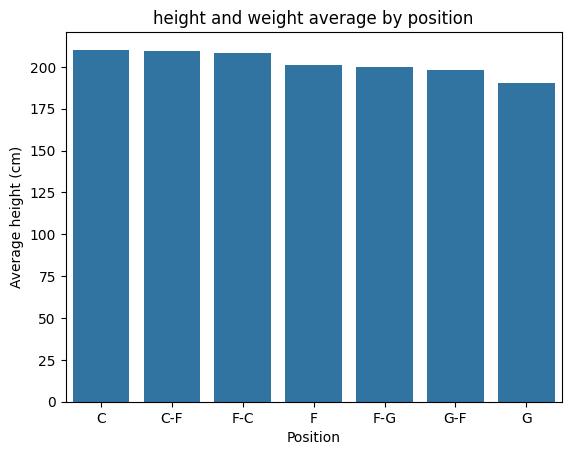

In [8]:
def height_to_cm(height_str):
    if isinstance(height_str, str) and '-' in height_str:
        try:
            feet, inches = map(int, height_str.strip().split('-'))
            return round((feet * 30.48) + (inches * 2.54), 1)
        except:
            return np.nan
    return np.nan

df["HEIGHT_CM"] = df["HEIGHT"].apply(height_to_cm)

df_posi = df.groupby("POSITION")[["HEIGHT_CM", "WEIGHT"]].mean().sort_values("HEIGHT_CM", ascending=False)

graphic = sns.barplot(x=list(df_posi.index), y=list(df_posi["HEIGHT_CM"]))

graphic.set_title("height and weight average by position")

graphic.set_xlabel("Position")

graphic.set_ylabel("Average height (cm)")

plt.show()


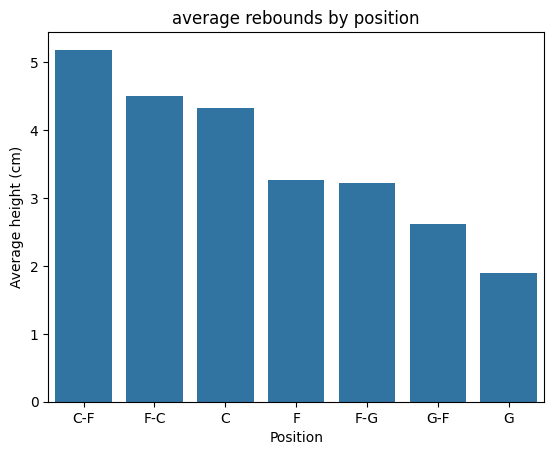

In [9]:
df_posi = df.groupby("POSITION")[["HEIGHT_CM", "REB"]].mean().sort_values("REB", ascending=False)

graphic = sns.barplot(x=list(df_posi.index), y=list(df_posi["REB"]))

graphic.set_title("average rebounds by position")

graphic.set_xlabel("Position")

graphic.set_ylabel("Average height (cm)")

plt.show()

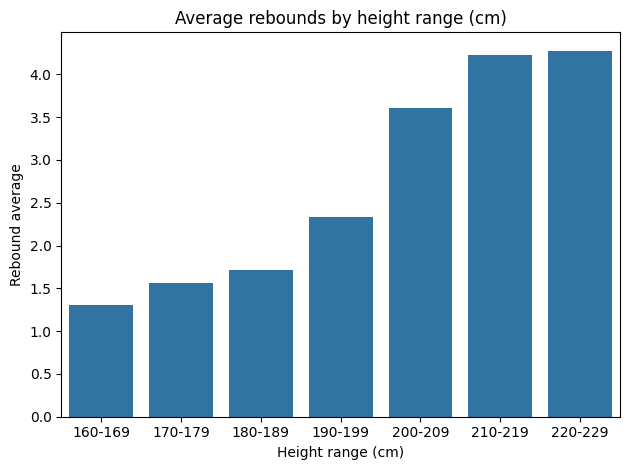

In [53]:
bins = [160, 170, 180, 190, 200, 210, 220, 230]

labels = ["160-169", "170-179", "180-189", "190-199", "200-209", "210-219", "220-229"]

df["HEIGHT_RANGE_CM"] = pd.cut(df["HEIGHT_CM"], bins=bins, labels=labels)

df_height_reb = df.groupby("HEIGHT_RANGE_CM", observed=True)["REB"].mean().dropna()

graphic = sns.barplot(x=df_height_reb.index, y=df_height_reb.values)

graphic.set_title("Average rebounds by height range (cm)")
graphic.set_xlabel("Height range (cm)")
graphic.set_ylabel("Rebound average")

plt.tight_layout()
plt.show()




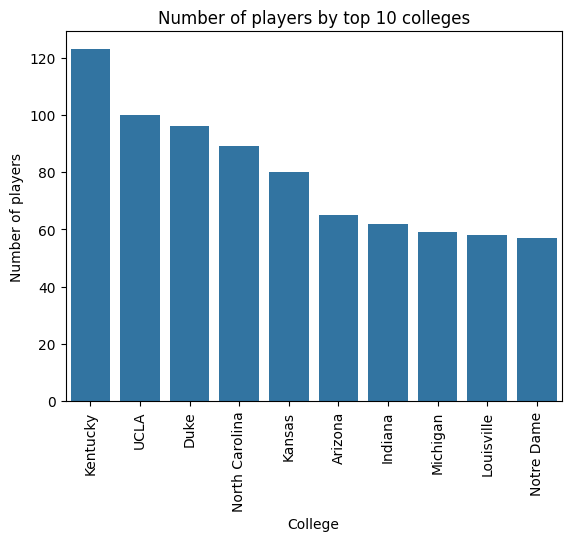

In [11]:
df_college = df.groupby("COLLEGE")["PLAYER_LAST_NAME"].count()

top_df_college = df_college.sort_values(ascending=False).head(10)

graphic = sns.barplot(x=top_df_college.index, y=top_df_college.values)

graphic.set_title("Number of players by top 10 colleges")

graphic.set_xlabel("College")

graphic.set_ylabel("Number of players")

plt.xticks(rotation=90)

plt.show()

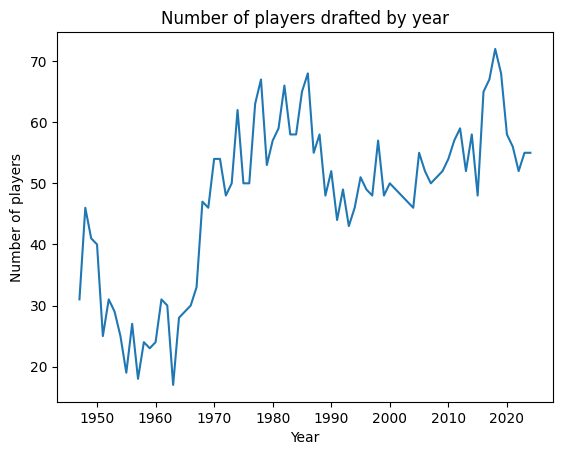

In [12]:
df_draft = df.groupby("DRAFT_YEAR")["PLAYER_LAST_NAME"].count()

graphic = sns.lineplot(x=df_draft.index, y=df_draft.values)

graphic.set_title("Number of players drafted by year")

graphic.set_xlabel("Year")

graphic.set_ylabel("Number of players")

plt.show()

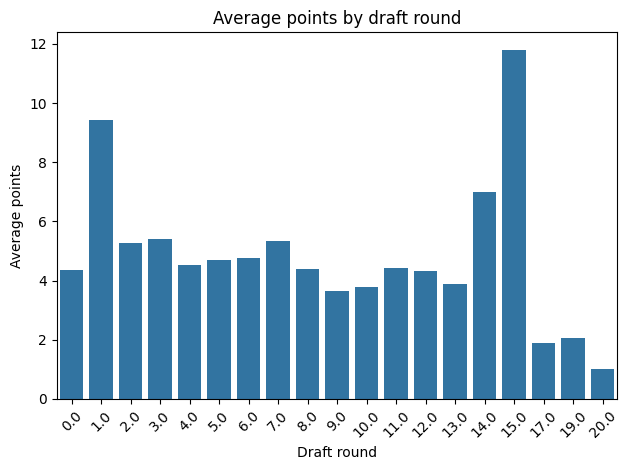

In [13]:
df_draft = df.groupby("DRAFT_ROUND")["PTS"].mean().sort_values(ascending=False)

graphic = sns.barplot(x=df_draft.index, y=df_draft.values)

graphic.set_title("Average points by draft round")

graphic.set_xlabel("Draft round")

graphic.set_ylabel("Average points")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

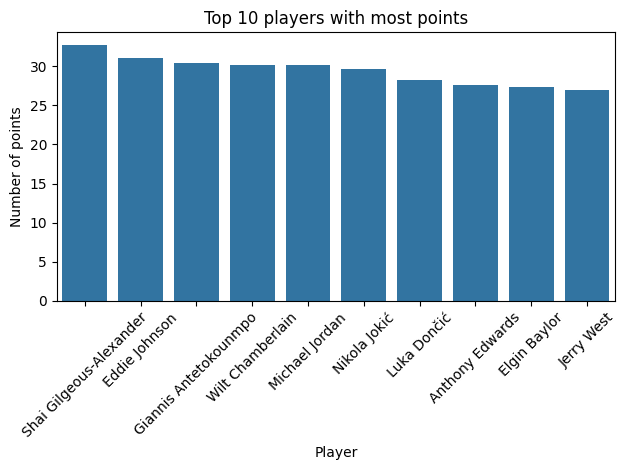

In [54]:
df["PLAYER_NAME"] = df["PLAYER_FIRST_NAME"] + " " + df["PLAYER_LAST_NAME"]

df_at = df.groupby("PLAYER_NAME")["PTS"].sum().sort_values(ascending=False)

top_df_at = df_at.head(10)

graphic = sns.barplot(x=top_df_at.index, y=top_df_at.values)

graphic.set_title("Top 10 players with most points")

graphic.set_xlabel("Player")

graphic.set_ylabel("Number of points")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

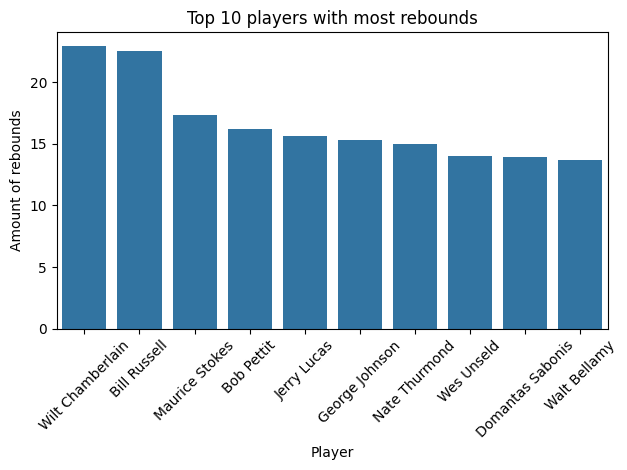

In [44]:
df_at = df.groupby("PLAYER_NAME")["REB"].sum().sort_values(ascending=False)

top_df_at = df_at.head(10)

graphic = sns.barplot(x=top_df_at.index, y=top_df_at.values)

graphic.set_title("Top 10 players with most rebounds")

graphic.set_xlabel("Player")

graphic.set_ylabel("Amount of rebounds")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

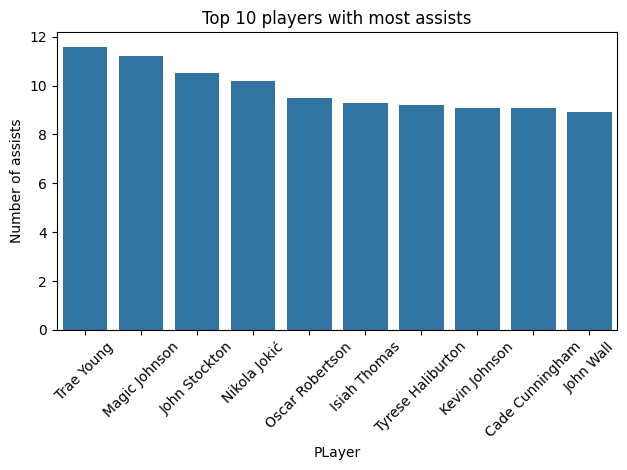

In [45]:
df_at = df.groupby("PLAYER_NAME")["AST"].sum().sort_values(ascending=False)

top_df_at = df_at.head(10)

graphic = sns.barplot(x=top_df_at.index, y=top_df_at.values)

graphic.set_title("Top 10 players with most assists")

graphic.set_xlabel("PLayer")

graphic.set_ylabel("Number of assists")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

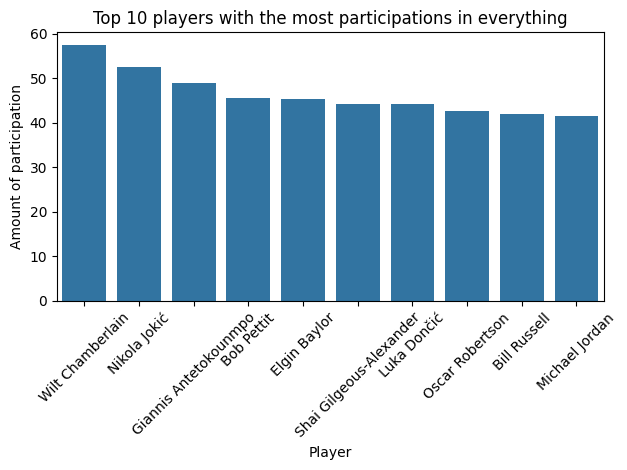

In [46]:
df["TOTAL_PARTICIPATION"] = df["PTS"] + df["AST"] + df["REB"]

df_at = df.groupby("PLAYER_NAME")["TOTAL_PARTICIPATION"].mean().sort_values(ascending=False)

top_df_at = df_at.head(10)

graphic = sns.barplot(x=top_df_at.index, y=top_df_at.values)

top_df_at = df_at.head(10)

graphic.set_title("Top 10 players with the most participations in everything")

graphic.set_xlabel("Player")

graphic.set_ylabel("Amount of participation")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

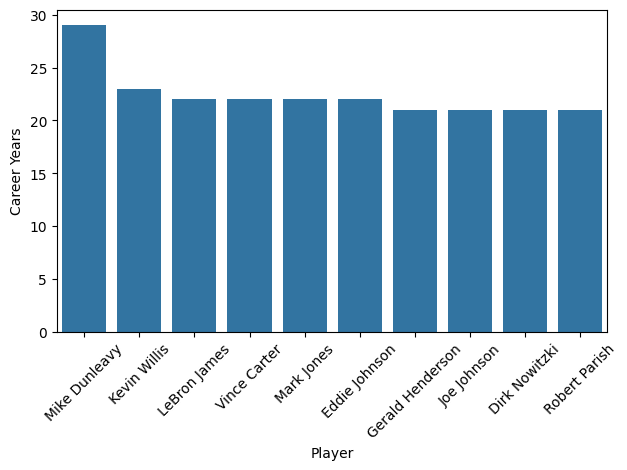

In [51]:
df["PLAYER_NAME"] = df["PLAYER_FIRST_NAME"] + " " + df["PLAYER_LAST_NAME"]

def years_played(row):
    return list(range(row["FROM_YEAR"], row["TO_YEAR"] + 1))

df["YEARS_PLAYED"] = df.apply(years_played, axis=1)

df_expanded = df.explode("YEARS_PLAYED")

carreira_anos = df_expanded.groupby("PLAYER_NAME")["YEARS_PLAYED"].nunique()

top_carreira = carreira_anos.sort_values(ascending=False).head(10)

graphic = sns.barplot(x=top_carreira.index, y=top_carreira.values)

graphic.set_xlabel("Player")
graphic.set_ylabel("Career Years")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
